# UCL

## COMP0164 Digital Finance

## Workshop 3: Data Processing, Stocks, and CAPM

# Table of Contents
* [1. Imports](#1.-Imports)
* [2. Stock Market Data](#2.-Stock-Market-Data)
    * [2.1 Plotting Financial Returns](#2.1-Plotting-Financial_returns)
    * [2.2 Returns Distribution](#2.2-Returns-Distribution)
    * [2.3 Average Annualized Retrun](#2.3-Average-Annualized-Return)
    * [2.4 Variance](#2.4-Variance)
    * [2.5 Annualized Variance](#2.5-Annualized-Variance)
    * [2.6 Skewness](#2.6-Skewness)
    * [2.7 Kurtosis](#2.7-Kurtosis)
    * [2.8 Statistical Tests for Normality](#2.8-Statistical-Tests-for-Normality)
* [3. Python Libraries for Time Series](#3.-`python`-Libraries-for-Time-Series)
* [4. Time Series Data](#4.-Time-Series-Data)
    * [4.1 Descriptive vs Predictive](#4.1-Descriptive-vs-Predictive)
    * [4.2 Time Series](#4.2-Time-Series)
        * [4.2.1 Mobing Window](#4.2.1-Moving-Window)
        * [4.2.2 Feature Engineering in Time Series](#4.2.2-Feature-Engineering-in-Time-Series)
        * [4.2.3 Calculating Lag Features](#4.2.3-Calcualting-Lag-Features)
        * [4.2.4 Rolling Window Statistics](#4.2.4-Rolling-Window-Statistics)
        * [4.2.5 Expanding Window Statistics](#4.2.5-Expanding-Window-Statistics)
    * [4.3 Exploration and Visualization](#4.3-Exploration-and-Visualization)
        * [4.3.1 Lag Plot](#4.3.1-Lag-Plot)
        * [4.3.2 Autocorrelation Plots](#4.3.2-Autocorrelation-Plots)
    * [4.4 Date and Time Data Types and Tools](#4.4-Date-and-Time-Data-Types-and-Tools)
        * [4.4.1 Time Series Basics](#4.4.1-Time-Series-Basics)
    * [4.5 Time Series in Finance](#4.5-Time-Series-in-Finance)
* [5. Stock Analysis](#5.-Stock-Analysis)
    * [5.1 Downloading Data](#5.1-Downloading-Data)
    * [5.2 Past Five-Year Performance](#5.2-Past-Five-Year-Performance)
    * [5.3 More Information About the Tickers](#5.3-More-Information-About-the-Tickers)
* [6. CAPM](#6.-CAPM)
    * [6.1 Stock Monthly Retrun](#6.1-Stock-Month;y-Return)
    * [6.2 Estimation of the Risk-Free Rate and Market Return](#6.2-Estimation-of-the-Risk-Free-Rate-and-Market-Return)
    * [6.3 Estimation of Beta](#6.3-Estimation-of-Beta)
        * [6.3.1 Estimating Beta Using Linear Regression Fit](#6.3.1-Estimating-Beta-Using-Linear-Regrtession-Fit)
        * [6.3.2 Estimating Beta Using Covariance and Variance](#6.3.2-Estimating-Beta-Using-Covariance-and-Variance)
    * [6.4 CAPM: Exercise](#6.4-CAPM:-Exercises)
* [7. Modelling Stock Movements](#7.-Modelling-Stock-Movements)
    * [7.1 Modelling Stock Movements: Standard Python Implementation](#7.1-Modelling-Stock-Movements:-Standard-Python-Implementation)
    * [7.2 Modelling Stock Movements: NumPy Implementation](#7.2-Modelling-Stock-Movements:-NumPy-Implementation)
    * [7.3 Modelling Stock Movements: Brownian Motion](#7.3-Modelling-Stock-Movements:-Brownian-Motion)
    * [7.4 Modelling Stock Movements: Exercise](#7.4-Modelling-Stock-Movements:-Exercises)
* [8. Capital Structure: Case Study](#8.-Capital-Structure:-Case-Study)

# 1. Imports

We need to import the following modules:

In [3]:
import numpy as np
import pandas as pd
import datetime
import yfinance as yf
import statsmodels.api as sm
import getFamaFrenchFactors as gff
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Seaborn chart size configuration
sns.set(rc={'figure.figsize':(11.7,8.27)})

# 2. Stock Market Data

To get financial data, you can use [Quandl](https://www.quandl.com/). **`Quandl`** is a platform that serves financial, economic, and alternative data. These sources of data are contributed by various data publishers, including the United Nations, World Bank, central banks, trading exchanges, and investment research firms. 

To use **`Quandl`** you need can install the `quandl` package:
            
> pip install quandl
            
[Register as an student](https://www.quandl.com/sign-up) to get a free API key to access the premium datasets.

However, in our examples we <mark>will use yfinance package</mark> that uses **`Yahoo Finance`** API.

In [4]:
# Example of data collection from yfinance
import yfinance as yf

msft_ohlc = yf.download("MSFT", start="2010-01-01")
msft_ohlc.info()

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3470 entries, 2010-01-04 to 2023-10-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3470 non-null   float64
 1   High       3470 non-null   float64
 2   Low        3470 non-null   float64
 3   Close      3470 non-null   float64
 4   Adj Close  3470 non-null   float64
 5   Volume     3470 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 189.8 KB


## 2.1 Plotting Financial Returns

The dataframe with the data that we got from `yfinance` included daily Open, High, Low, Close, Adjusted Close, and Volume data, often referred to as **OHLCV data**.

The <mark>Adjusted Close column is the most important</mark>. It is <mark>normalized for stock splits, dividends, and other corporate actions, and is a true reflection of the return of the stock over time</mark>. You will be using the adjusted close price to calculate the returns of the stock in this exercise.

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2010-01-04  30.620001  31.100000  30.590000  30.950001  23.522570  38409100   
2010-01-05  30.850000  31.100000  30.639999  30.959999  23.530163  49749600   
2010-01-06  30.879999  31.080000  30.520000  30.770000  23.385759  58182400   
2010-01-07  30.629999  30.700001  30.190001  30.450001  23.142563  50559700   
2010-01-08  30.280001  30.879999  30.240000  30.660000  23.302166  51197400   

             Returns  
Date                  
2010-01-04       NaN  
2010-01-05  0.000323  
2010-01-06 -0.006137  
2010-01-07 -0.010399  
2010-01-08  0.006897  


<Axes: xlabel='Date'>

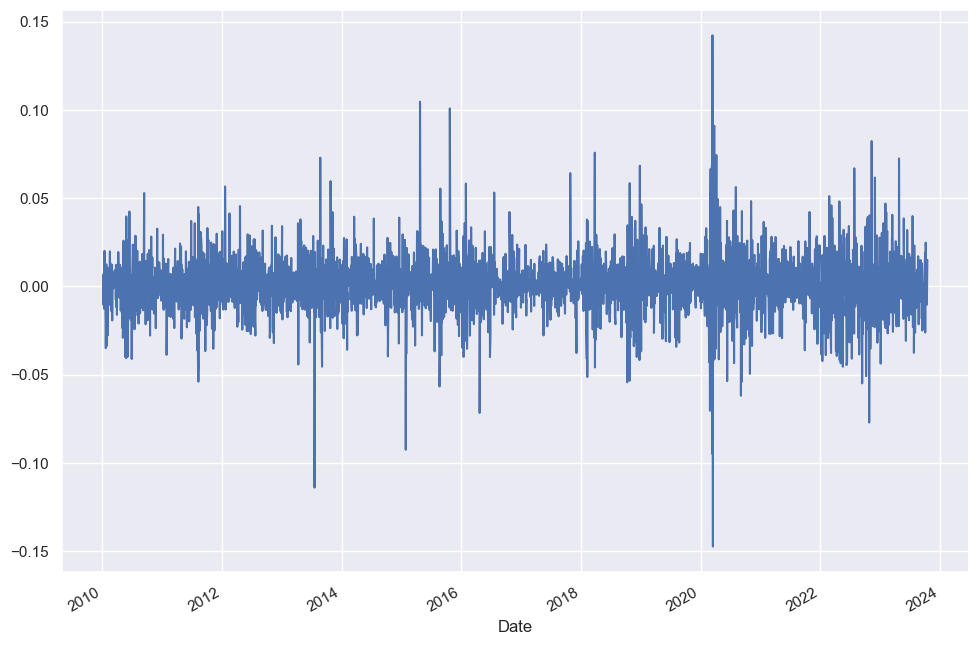

In [5]:
# Calculate the daily returns of the adjusted close price
msft_ohlc['Returns'] = msft_ohlc['Adj Close'].pct_change()

# Check the first five rows of StockPrices
print(msft_ohlc.head())

# Plot the returns column over time
msft_ohlc['Returns'].plot()
# px.line(data_frame=msft_ohlc, x=msft_ohlc.index, y=msft_ohlc["Returns"])

## 2.2 Returns Distribution

In order to analyze the probability of outliers in returns, it is helpful to visualize the historical returns of a stock using a histogram.

You can <mark>use the histogram to show the historical density or frequency of a given range of returns</mark>. Note the outliers on the left tail of the return distribution are what you often want to avoid, as they represent large negative daily returns. Outliers on the right hand side of the distribution are normally particularly good events for the stock such as a positive earnings surprise.

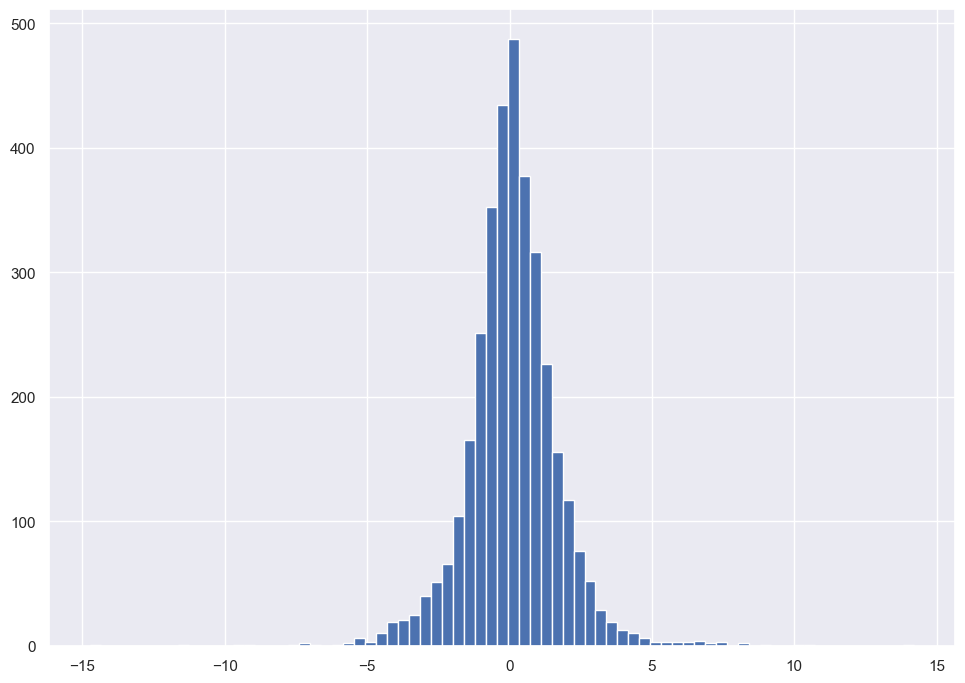

In [6]:
import matplotlib.pyplot as plt

# Convert the decimal returns into percentage returns
percent_return = msft_ohlc['Returns']*100

# Drop the missing values
returns_plot = percent_return.dropna()

# Plot the returns histogram
plt.hist(returns_plot, bins=75,density=False)
plt.show()

## 2.3 Average Annualized Return

You can calculate the **average historical return** of a stock by using **`NumPy`**'s `mean()` function.

When you are calculating the **average daily return** of a stock, you are essentially estimating the first moment $\mu$ of the historical returns distribution.

But what use are daily return estimates to a long-term investor? You can use the formula below to estimate the **average annual return** of a stock given the average daily return and the number of trading days in a year (typically there are roughly 252 trading days in a year):

$$\text{Average Annualized Return} = (1+\mu)^{252}−1$$

The `msft_ohlc` object from the previous exercise is stored as a variable.

In [7]:
# Import numpy as np
import numpy as np

# Calculate the average daily return of the stock
mean_return_daily = np.mean(msft_ohlc['Returns'])
print(mean_return_daily)

# Calculate the implied annualized average return
mean_return_annualized = ((1+mean_return_daily)**252)-1
print(mean_return_annualized)

0.0008981188915712345
0.25385698377115307


- The average daily return of Microsoft's stock ($\mu$) is `0.09%` per day.
- The annualized return is an impressive `25.47%` per year, which is congruent with [calculation for a range of 10 year of Microsoft stock performance](https://www.netcials.com/stock-10-year-history/MSFT-Microsoft-Corporation/).

## 2.4 Variance

Just like you estimated the first moment of the returns distribution in the last exercise, you can can also estimate the second moment, or **variance of a return distribution** using **`NumPy`**.

In this case, you will first need to calculate the **daily standard deviation** ($\sigma$), or **volatility of the returns** using `numpy.std()`. The variance is simply $\sigma^{2}$.

In [8]:
# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(msft_ohlc['Returns'])
print(sigma_daily)

# Calculate the daily variance
variance_daily = sigma_daily**2
print(variance_daily)

0.016382933534483814
0.0002684005111953143


- The average daily volatility of the stock ($\sigma$) is `1.64%` per day.
- The average daily variance of the stock is `0.026%`.

## 2.5 Annualizing Variance

You can't <mark>annualize the variance in the same way that you annualized the mean</mark>.

<mark>To annualize the variance</mark> you will need to multiply $\sigma$ by the <mark>square root of the number of trading days in a year</mark>. There are typically <mark>252 trading days</mark> in a calendar year. Let's assume this is the case for this exercise.

This will get you the **annualized volatility**, but to get **annualized variance**, you'll need to square the annualized volatility just like you did for the daily calculation.

In [9]:
# Annualize the standard deviation
sigma_annualized = sigma_daily*np.sqrt(252)
print(sigma_annualized)

# Calculate the annualized variance
variance_annualized = sigma_annualized**2
print(variance_annualized)

0.2600710072676676
0.0676369288212192


- There is an annualized volatility ($\sigma$) of `26.03%` per year.
- The annualized variance is `5.02%` per year.

## 2.6 Skewness

To calculate the third moment, or **skewness of a returns** distribution in **`Python`**, you can use the `skew()` function from `scipy.stats`.

Remember that a <mark>negative skew is a right-leaning curve</mark>, while <mark>positive skew is a left-leaning curve</mark>.

In finance, you would tend to want positive skewness, as this would mean that the probability of large positive returns is unusually high, and the negative returns are more closely clustered and predictable.

<img src="./static/Negative_and_positive_skew_diagrams_(English).svg.png" alt="No image found">

In [10]:
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns = msft_ohlc['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
print(returns_skewness)

0.059314468519700084


The skewness of the stock returns is `0.059`. For comparison, a <mark>normal distribution has a skewness of 0</mark>.

## 2.7 Kurtosis

Finally, to calculate the fourth moment of a distribution, you can use the `kurtosis()` function from `scipy.stats`.

Note that <mark>this function actually returns the excess kurtosis</mark>, not the 4th moment itself. In order to calculate kurtosis, simply add 3 to the excess kurtosis returned by `kurtosis()`.

In [11]:
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns)
print(excess_kurtosis)

# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis+3
print(fourth_moment)

7.667205229157501
10.667205229157501


- The kurtosis of the stock returns is 13.87.
- The excess kurtosis is 10.87.
- <mark>A normal distribution has a kurtosis of 3, and an excess kurtosis of 0</mark>.

## 2.8 Statistical Tests for Normality

In order to truly be confident in your judgement of the normality of the stock's return distribution, you will want to use a true statistical test rather than simply examining the kurtosis or skewness.

You can use the `shapiro()` function from `scipy.stats` to run a **Shapiro-Wilk test of normality** on the stock returns. The function will return two values in a list. The <mark>first value is the t-stat of the test</amrk>, and the <mark>second value is the p-value</mark>.

You can use the p-value to make a judgement about the normality of the data. If the <mark>p-value is less than or equal to 0.05, you can safely reject the null hypothesis of normality</mark> and assume that the data are non-normally distributed.

In [12]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results: ShapiroResult(statistic=0.9317346811294556, pvalue=3.458242956162804e-37)
P-value:  3.458242956162804e-37


The p-value is less than `0.05`, so the null hypothesis of normality is rejected. The data does not have a normal distribution.

# 3. **`python`** Libraries for Time Series

[**`Pandas`**](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)
- The `Series` object for representing a univariate time series
- Explicit handling of date-time indexes in data and date-time ranges
- Transforms such as shifting, laggin and filling 
- Resampling methods such as up-sampling, down-sampling and aggregation

[**`Statsmodels`**](http://statsmodels.sourceforge.net/)
- Statistical tests for stationarity such as the Augmented Dickey-Fuller unit root test
- Time series analysis plots such as autocorrelation function (ACF) and partial autocorrela- tion function (PACF).
- Linear time series models such as autoregression (AR), moving average (MA), autoregres- sive moving average (ARMA), and autoregressive integrated moving average (ARIMA).

[**`scikit-learn`**](http://scikit-learn.org/)

- The suite of data preparation tools, such as scaling and imputing data.
- Machine learning algorithms
- The resampling methods for estimating the performance of a model on unseen data, specifically the `TimeSeriesSplit` class 


# 4. Time Series Data 

<mark>Time series adds an explicit order dependence between observations a time dimension</mark>:. This additional dimension is both a constraint and a structure that provides a source of additional information.

A **time series** is a <mark>sequence of observations taken sequentially in time</mark>.

Time series can also be irregular without a fixed unit or time or offset between units. How you mark and refer to time series data depends on the application and you may have one of the following:

• <mark>**Timestamps**: specific instants in time</mark>.

• <mark>**Fixed periods**: such as the month January 2007 or the full year 2010</mark>.

• <mark>**Intervals of time**: indicated by a start and end time stamp. Periods can be thought of as special cases of intervals</mark>.

• <mark>**Experiment or elapsed time**: each timestamp is a measure of time relative to a particular start time. For example, the diameter of a cookie baking each second since being placed in the oven</mark>.

The simplest and most widely used kind of time series are those indexed by timestamp.

## 4.1 Descriptive vs Predictive 

- **Time series analysis (Descriptive)**: a time series is modeled to determine its components in terms of seasonal patterns, trends, relation to external factors, etc.

- **Time series forecasting (Predictive)**: time series forecasting uses the information in a time series (perhaps with additional information) to forecast future values of that series. - *Page 18-19, Practical Time Series Forecasting with R: A Hands-On Guide*

### Time series analysis 

- When using classical statistics, the primary concern is the analysis of time series. 
- Time series analysis involves <mark>developing models that best capture or describe an observed time series</mark> in order <mark>to understand the underlying causes</mark>. 
- This field of study seeks the *why* behind a time series dataset. 
- This often involves making assumptions about the form of the data and <mark>decomposing the time series into constitution components</mark>. 

### Time series forecasting

- Making predictions about the future is called **extrapolation** in the classical statistical handling of time series data. More modern fields focus on the topic and refer to it as time series forecasting. 
- Forecasting involves <mark>taking models fit on historical data and using them to predict future observations</mark>.
- Descriptive models can borrow from the future (i.e. to smooth or remove noise), they only seek to best describe the data. An important distinction in <mark>forecasting</mark> is that the future is <mark>completely unavailable</mark> and must only be estimated from what has already happened.
- The performance of a time series forecasting model is determined by its evaluating its predictions of future observations. 

### Components of Time Series

Time series analysis provides a body of techniques to better understand a dataset. Perhaps the most useful of these is the decomposition of a time series into 4 constituent parts:

- **Level**: <mark>the baseline value for the series if it were a straight line</mark>.

- **Trend**: <mark>the optional (often linear) increasing or decreasing behavior of the series over
time</mark>.

- **Seasonality**: <mark>the optional repeating patterns or cycles of behavior over time</mark>.

- **Noise**: <mark>the optional variability in the observations that cannot be explained by the model</mark>.

### Concerns of Forecasting

Common concerns in dorcatinf:

| **Problem** | **Intuition** |
| --- | --- |
| **Data Avaulability and Gather it All Together** | More data is often more helpful, offering greater opportunity for exploratory data analysis, model testing and tuning, and model fidelity. |
| **Required Time Horizon of Predictions** | Short, medium or long term? Shorter time horizons are often easier to predict with higher confidence. |
| **Frequency of Forcast Updates or Static Forcasts** | Updating forecasts as new information becomes available often results in more accurate predictions. |
| **Temporal Frequency of Forcasts** | Often forecasts can be made at a lower or higher frequencies, allowing you to harness down-sampling, and up-sampling of data, which in turn can offer benefits while modeling. |

As we have seen previously, time series data often requires cleaning, scaling, and transforming:

- <mark>**Frequency**</mark>. Perhaps data is provided at a frequency that is too high to model or is unevenly spaced through time requiring resampling for use in some models.

- <mark>**Outliers**</mark>. Perhaps there are corrupt or extreme outlier values that need to be identified and handled.

- <mark>**Missing**</mark>. Perhaps there are gaps or missing data that need to be interpolated or imputed.

### Time Series Nomenclature (Notation)

It is important to quickly establish the standard terms used when describing time series data. The current time is defined as **`t`**, an observation at the current time is defined as `obs(t)`.

We are often interested in the observations made at prior times, called **lag times** or **lags**. 

Times in the past are negative relative to the current time. For example the previous time is `t-1` and the time before that is `t-2`. The observations at these times are `obs(t-1)` and `obs(t-2)` respectively. 

Times in the future are what we are interested in forecasting and are positive relative to the current time. For example the next time is `t+1` and the time after that is `t+2`. The observations at these times are `obs(t+1)` and `obs(t+2)` respectively.

For simplicity, we often drop the `obs(t)` notation and use `t+1` instead and assume we are talking about observations at times rather than the time indexes themselves. Additionally, we can refer to an observation at a lag by shorthand such as a lag of 10 or `lag=10` which would be the same as `t-10`. 

<mark>To summarize</mark>:
- `t-n`: A prior or lag time (e.g., `t-1` for the previous time). 
- `t`: A current time and point of reference.
- `t+n`: A future or forecast time (e.g., `t+1` for the next time).

### Examples of Time Series Forecasting

There is almost an endless supply of time series forecasting problems. Below are 10 examples from a range of industries to make the notions of time series analysis and forecasting more concrete:

- The corn yield in tons by state each year.
- Forecasting whether an EEG trace in seconds indicates a patient is having a seizure or not.
- The closing price of a stock each day.
- The birth rate at all hospitals in a city each year.
- Product sales in units sold each day for a store.
- The number of passengers through a train station each day. 
- Forecasting unemployment for a state each quarter.
- Predicting utilization demand on a server each hour.
- The size of the rabbit population in a state each breeding season. 
- The average price of gasoline in a city each day. (Dataiku case study)

## 4.2 Time Series

Time series forecasting can be framed as a supervised learning problem. 

This re-framing of your time series data allows you access to the suite of standard linear and nonlinear machine learning algorithms on your problem. 


### 4.2.1 Moving Window 

An important class of array transformations used for time series operations are statistics and other functions evaluated over a **moving/sliding window**. 

This can be <mark>useful for smoothing noisy or dealing with missing data</mark>. We will call these **moving window** functions, even though it includes functions without a fixed-length window.

We can restructure the data to look like a supervised learning problem, by <mark>using previous time steps as input variables and use the next time step as the output variable</mark>.

Logic of the proceedure:

1. We can see that the previous time step is the input (`X`) and the next time step is the output (`y`) in our supervised learning problem.

2. We can see that the order between the observations is preserved, and must continue to be preserved when using this dataset to train a supervised model.

3. We can see that we have no previous value that we can use to predict the first value in the sequence. For the training purposes, we will delete this row as we cannot use it.

4. We can also see that we do not have a known next value to predict for the last value in the sequence. We may want to delete this value while training our supervised model also.

In statistics and time series analysis, this is called a **lag** or **lag method**. 

The number of previous time steps used as the input variables is called the **window width** or **size of the lag**. This <mark>sliding window is the basis for how we can turn any time series dataset into a supervised learning problem</mark>.

This is useful for:

- Turning a time series into either a regression or a classification supervised learning problem for real-valued or labeled time series values.

- Applying any of the standard linear and nonlinear machine learning algorithms, as long as the order of the rows is preserved.

- Changing the window width to include more (less) of previous time steps.

- Working with multivariate time series (i.e., a time series that has more than one value).

The sweet spot for using machine learning for time series is where classical methods fall down. 

This may be with complex univariate time series, and is more likely with multivariate time series given the additional complexity.

### 4.2.2 Feature Engineering in Time Series 

There is no concept of input and output features in time series. Instead, we must choose the variable to be predicted and use feature engineering to construct all of the inputs that will be used to make predictions for future time steps.

Types of features:

| **Feature** | **Description** |
| --- | --- |
| **Lag Features** | Lag features are the classical way that time series forecasting problems are transformed into supervised learning problems. The simplest approach is to predict the value at the next time `(t+1)` given the value at the current time `(t)`. |
| **Leading Features** | We can't have features that contain information about a time `(t+1)` but we might have other indicator variables for the things we are trying to predict. Sales leads as a meausre for predicting revenue for example. |

The goal of <mark>feature engineering is to provide strong and ideally simple relationships between new input features and the output feature</mark> for the supervised learning algorithm to model.

In [13]:
# Create date time features of a dataset
import pandas as pd

series = pd.read_csv('./static/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True)
df = pd.DataFrame()
df['month'] = [series.index[i].month for i in range(len(series))]
df['day'] = [series.index[i].day for i in range(len(series))]
df['temperature'] = [series.iloc[i][0] for i in range(len(series))]
df.head(5)

C:\Users\lyakh\AppData\Local\Temp\ipykernel_24628\3473098061.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['temperature'] = [series.iloc[i][0] for i in range(len(series))]


,month,day,temperature
0,1,1,20.7
1,1,2,17.9
2,1,3,18.8
3,1,4,14.6
4,1,5,15.8


Using just the month and day information alone to predict temperature is not sophisticated and will likely result in a poor model. 

Nevertheless, this information coupled with additional engineered features may ultimately result in a better model.

You may enumerate all the properties of a time-stamp and consider what might be useful for your problem, such as:

- Minutes elapsed for the day
- Hour of day
- Business hours or not
- Weekend or not
- Season of the year.
- Business quarter of the year
- Daylight savings or not
- Public holiday or not
- Leap year or not

From these examples, you can see that you’re not restricted to the raw integer values. You can use binary flag features as well, like whether or not the observation was recorded on a public holiday. In the case of the minimum temperature dataset, maybe the season would be more relevant. It is <mark>creating domain-specific features</mark> like this that are more likely to <mark>add value to your model</mark>. 

Date-time based features are a good start, but it is often a lot more useful to include the values at previous time steps - these are called lagged values.

### 4.2.3 Calculating Lag Features

The **`Pandas`** library provides the `shift()` function to help create these shifted or lag features from a time series dataset. 

Shifting the dataset by 1 creates the `t-1` column, adding a `NaN` value for the first row.

In [14]:
temps = pd.DataFrame(series.values)
print(temps.head(5))

dataframe = pd.concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t-1', 't']
print(dataframe.head(5))

      0
0  20.7
1  17.9
2  18.8
3  14.6
4  15.8
    t-1     t
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8


In [15]:
dataframe = pd.concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-3', 't-2', 't-1', 't']
dataframe.head(5)

,t-3,t-2,t-1,t
0,NaN,NaN,NaN,20.7
1,NaN,NaN,20.7,17.9
2,NaN,20.7,17.9,18.8
3,20.7,17.9,18.8,14.6
4,17.9,18.8,14.6,15.8


A diffculty with the sliding window approach is how large to make the window for your problem. 

Perhaps a good starting point is to perform a <mark>sensitivity analysis</mark> to try a suite of different window widths to in turn create a suite of different views of your dataset and see <mark>which window width results in better performing models</mark>. There will be a point of diminishing returns.

### 4.2.4 Rolling Window Statistics 

A step beyond adding raw lagged values is to <mark>add a summary of the values at previous time steps</mark>. We can calculate summary statistics across the values in the sliding window and include these as features in our dataset. Perhaps the most useful is the mean of the previous few values, also called the **rolling mean**.

In [16]:
temps = pd.DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = pd.concat([means, temps], axis=1)
dataframe.columns = ['mean(t-2, t-1)', 't']
dataframe.head(5)

,"mean(t-2, t-1)",t
0,NaN,20.7
1,NaN,17.9
2,19.30,18.8
3,18.35,14.6
4,16.70,15.8


- The first `NaN` was created by the shift of the series.

- The second because `NaN` cannot be used to calculate a mean value.

- Finally, the third row shows the expected value of `19.30` (the mean of `20.7` and `17.9`) used to predict the 3rd value in the series of `18.8`.

There are more statistics we can calculate and even different mathematical ways of calculating the definition of the window. Below is another example that shows a window width of 3 and a dataset comprised of more summary statistics, specifically the minimum, mean, and maximum value in the window.

You can see in the code that we are explicitly specifying the sliding window width as a named variable. This allows us to use it both in calculating the correct shift of the series and in specifying the width of the window to the `.rolling()` method.

In [17]:
temps = pd.DataFrame(series.values)
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't']
dataframe.head(5)

,min,mean,max,t
0,NaN,NaN,NaN,20.7
1,NaN,NaN,NaN,17.9
2,NaN,NaN,NaN,18.8
3,NaN,NaN,NaN,14.6
4,17.9,19.133333,20.7,15.8


### 4.2.5 Expanding Window Statistics

Another type of window that may be useful <mark>includes all previous data in the series</mark>. 

This is called an expanding window and can help with keeping track of the bounds of observable data. Like the `.rolling()` method on `DataFrame`, **`Pandas`** provides an `.expanding()` method that collects sets of all prior values for each time step.

In [18]:
temps = pd.DataFrame(series.values)
window = temps.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
dataframe.head(5)

,min,mean,max,t+1
0,20.7,20.700000,20.7,20.7
1,17.9,19.300000,20.7,17.9
2,17.9,19.133333,20.7,18.8
3,14.6,18.000000,20.7,14.6
4,14.6,17.560000,20.7,15.8


## 4.3 Exploration and Vizualisation

Visualization plays an important role in time series analysis and forecasting. Plots of the raw sample data can provide valuable diagnostics to identify temporal structures like trends, cycles, and seasonality that can influence the choice of model.

We will take a look at 6 different types of visualizations that you can use on your own time series data. They are:

1. Line Plots.
2. Histograms and Density Plots.
3. Box and Whisker Plots.
4. Heat Maps.
5. Lag Plots or Scatter Plots.
6. Autocorrelation Plots


<Axes: xlabel='Date'>

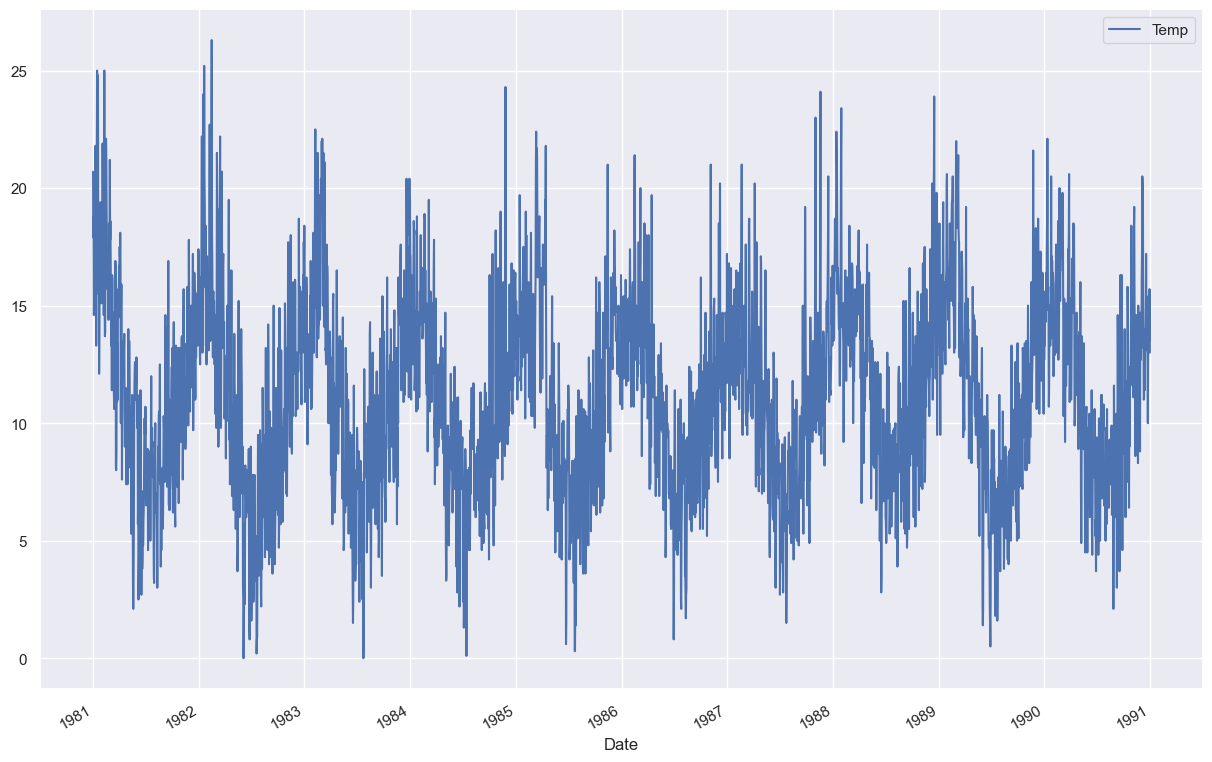

In [19]:
series.plot(figsize=(15, 10))

### 4.3.1 Lag Plot

A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot. It plots the observation at time `t` on the x-axis and the `lag=1` observation `t-1` on the y-axis.

- <mark>If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship</mark>.

- <mark>If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship</mark>.

- <mark>More points tighter in to the diagonal line suggests a stronger relationship</mark>.

- <mark>More spread from the line suggests a weaker relationship</mark>.

- <mark>A ball in the middle or a spread across the plot suggests a weak or no relationship</mark>.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

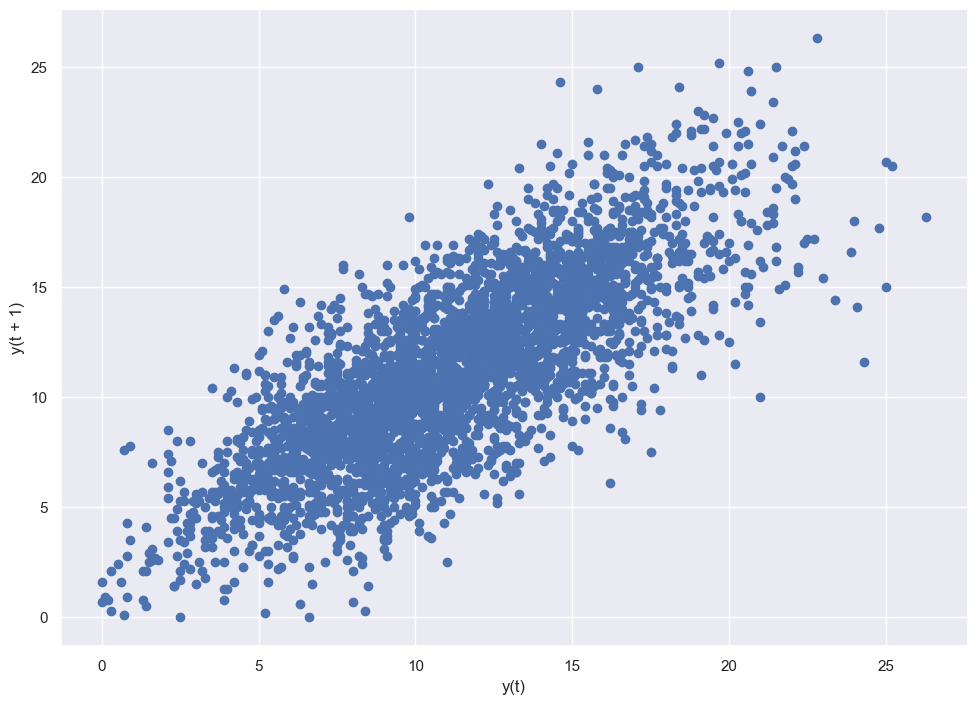

In [20]:
pd.plotting.lag_plot(series)

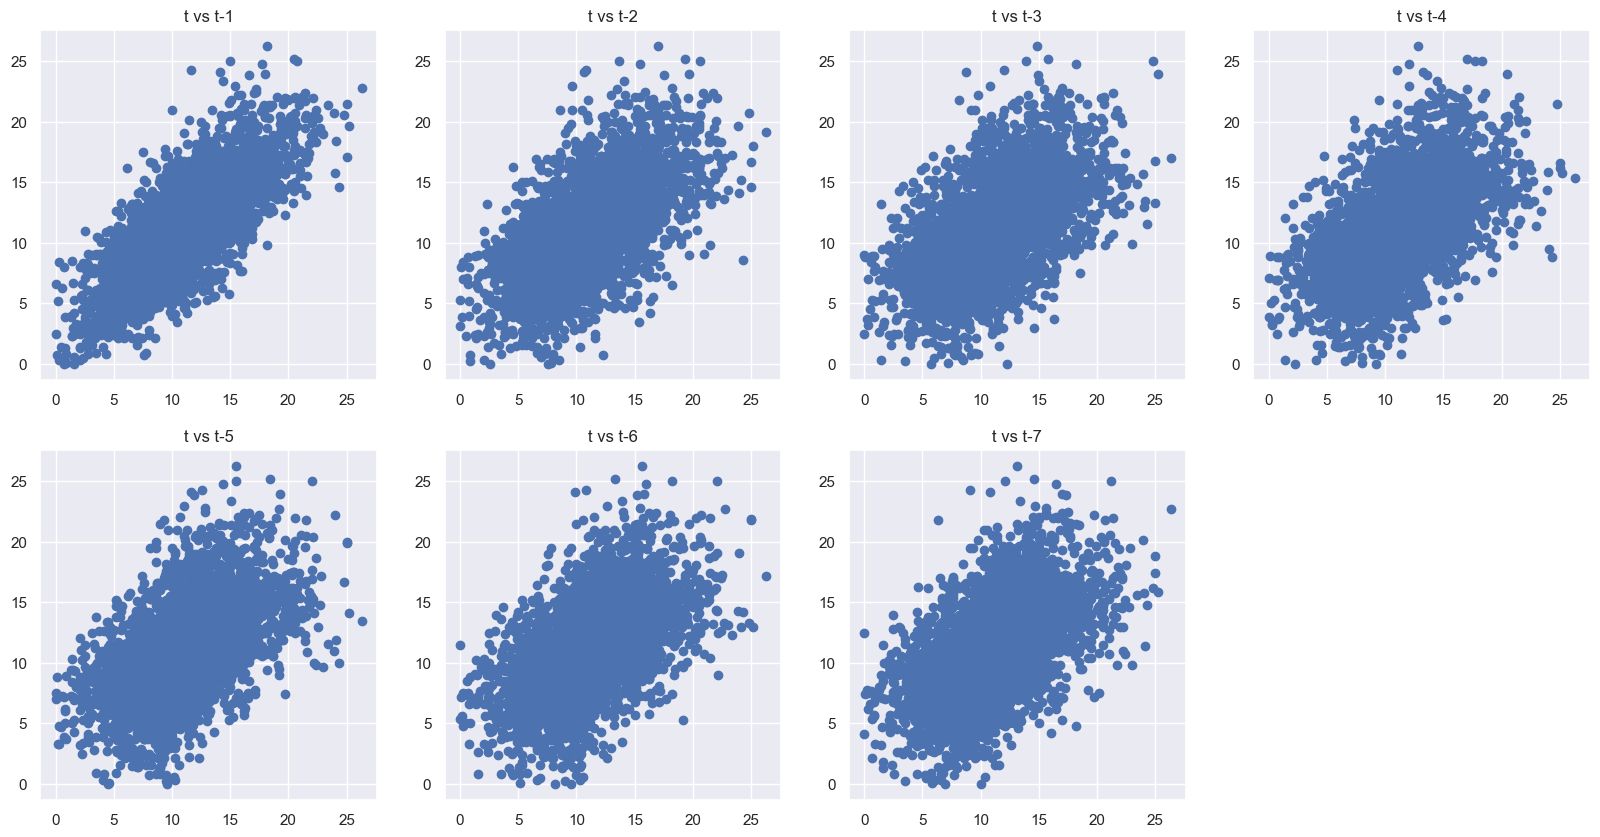

In [21]:
values = pd.DataFrame(series.values)

# Create lag features
lags = 7
columns = [values]
for i in range(1, (lags+1)):
    columns.append(values.shift(i))
df = pd.concat(columns, axis=1)

# Label new columns
column_names = ['t']
for i in range(1, (lags + 1)):                               
    column_names.append('t-'+str(i))
df.columns = column_names

# Plot of lag features vs current time step
plt.figure(1, figsize=(20, 10))
for i in range(1, (lags+1)):
    ax = plt.subplot(240+i)
    ax.set_title('t vs t-'+str(i))
    plt.scatter(x=df['t'].values, y=df['t-'+str(i)].values)
plt.show()

### 4.3.2 Autocorrelation Plots 

We can quantify the <mark>strength and type of relationship between observations and their lags</mark>. In statistics, this is called correlation, and when <mark>calculated against lag values in time series, it is called **autocorrelation** (**self-correlation**)</mark>.

A correlation value calculated between two groups of numbers, such as observations and their `lag=1` values, results in a number between -1 and 1. A <mark>value close to zero suggests a weak correlation</mark>, whereas a <mark>value closer to -1 or 1 indicates a strong correlation</mark>.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

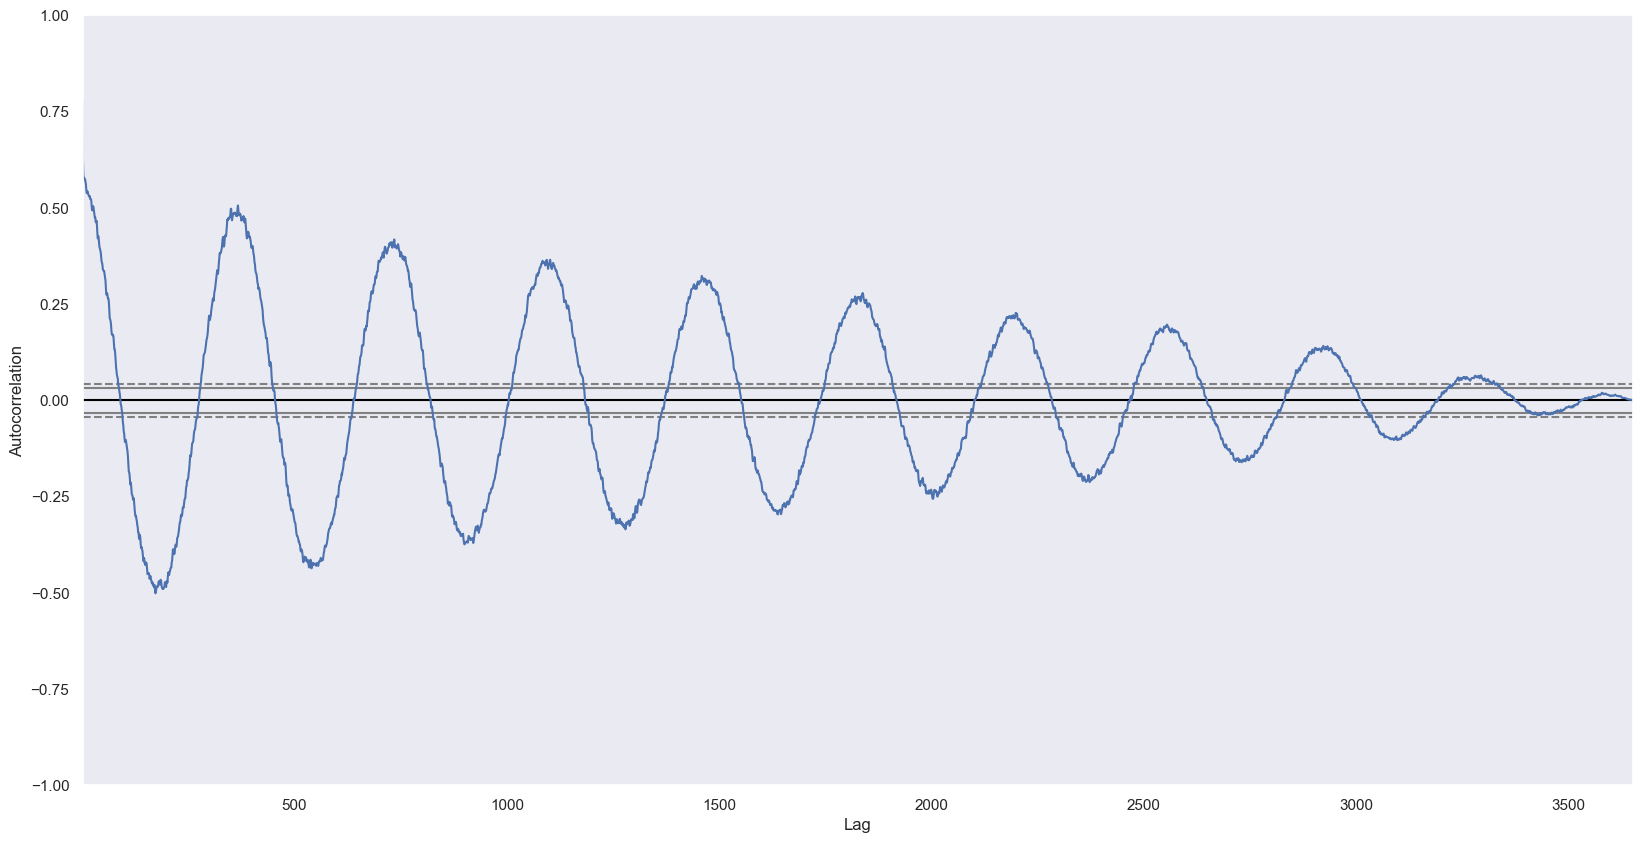

In [22]:
plt.figure(figsize=(20, 10))
pd.plotting.autocorrelation_plot(series)

The resulting plot shows lag along the x-axis and the correlation on the y-axis. <mark>Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful)</mark>. 

We can see that for the Minimum Daily Temperatures dataset we see cycles of strong negative and positive correlation. This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

## 4.4 Date and Time Data Types and Tools

Resampling involves changing the frequency of your time series observations. Two types of resampling are:

- **Upsampling**: where you increase the frequency of the samples, such as from minutes to seconds.

- **Downsampling**: where you decrease the frequency of the samples, such as from days to months.

The **`Python`** standard library includes data types for date and time data, as well as calendar-related functionality. 

The **`datetime`**, **`time`**, and **`calendar`** modules are the main places to start. The `datetime.datetime type`, or simply `datetime`, is widely used:

In [23]:
import datetime
now = datetime.datetime.now()
print(now)
(now.year, now.month, now.day)

2023-10-17 11:48:20.531439


(2023, 10, 17)

`datetime` stores both the date and time down to the microsecond.

`datetime.time delta` represents the temporal difference between two datetime objects:

In [24]:
delta = datetime.datetime(2011, 1, 7) - datetime.datetime(2008, 6, 24, 8, 15)
print(delta)
print(delta.days)
print(delta.seconds)

926 days, 15:45:00
926
56700


You can add (or subtract) a `timedelta` or multiple thereof to a `datetime` object to yield a new shifted object:

In [25]:
import datetime

start = datetime.datetime(2011, 1, 7)
print(start + datetime.timedelta(12))
print(start - 2*datetime.timedelta(12))

2011-01-19 00:00:00
2010-12-14 00:00:00


While this notebook is mainly concerned with the data types in **`Pandas`** and higher level time series manipulation, you will undoubtedly encounter the `datetime`-based types in many other places in **`Python`**.

### 4.4.1 Time Series Basics 

A basic kind of time series object in **`Pandas`** is a `Series` indexed by `timestamps`, which is often represented external to **`Pandas`** as **`Python`** strings or `datetime` objects:

In [26]:
import datetime
dates = [datetime.datetime(2011, 1, 2), datetime.datetime(2011, 1, 5),
         datetime.datetime(2011, 1, 7), datetime.datetime(2011, 1, 8),
         datetime.datetime(2011, 1, 10), datetime.datetime(2011, 1, 12)]
s = pd.Series(np.random.randn(6), index=dates)
s

2011-01-02   -0.433672
2011-01-05   -0.277368
2011-01-07   -0.565169
2011-01-08    0.014283
2011-01-10    0.595902
2011-01-12    0.092965
dtype: float64

In [27]:
s.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Like other Series, arithmetic operations between differently indexed time series automatically align on the dates:

In [28]:
s + s[::2]

2011-01-02   -0.867343
2011-01-05         NaN
2011-01-07   -1.130338
2011-01-08         NaN
2011-01-10    1.191804
2011-01-12         NaN
dtype: float64

In [29]:
stamp = s.index[2]
print(s[stamp])
print(s['1/10/2011'])
print(s['20110110'])

-0.5651687965356674
0.595901806290677
0.595901806290677


Other really useful concepts:

- Time Series with Duplicate Indices
- Date Ranges, Frequencies, and Shifting
- Generating Date Ranges
- Frequencies and Date Offsets
- Shifting (Leading and Lagging) Data (which we have seen)
- Time Zone Handling

## 4.5 Time Series in Finance

We can load up some time series data and resample it to business day frequency:

In [30]:
close_px_all = pd.read_csv('./static/stock_px_2.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

# Business day fequency 
close_px = close_px.resample('B').ffill()

We now introduce the rolling operator, which behaves similarly to `.resample()` and `.groupby()`. 

It can be called on a `Series` or `DataFrame` along with a `window`.

c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future

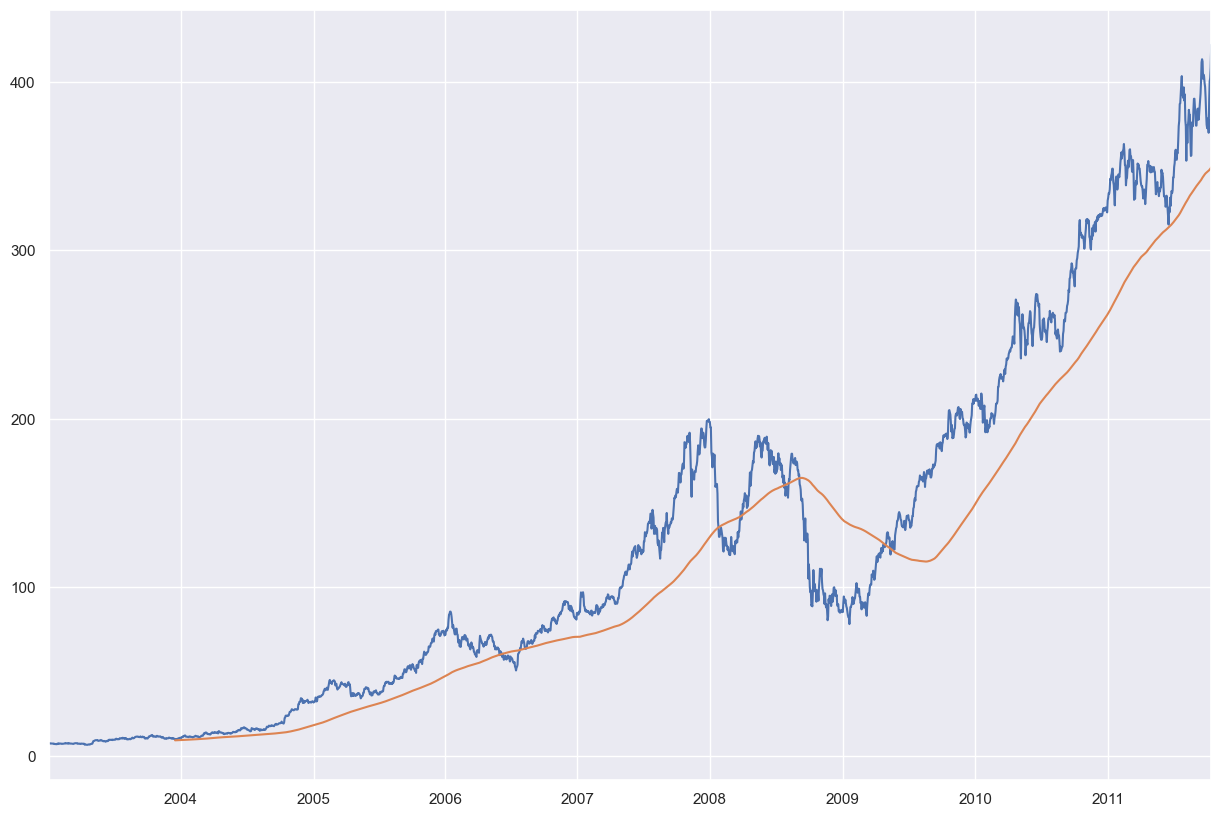

In [31]:
close_px.AAPL.plot(figsize=(15, 10))
close_px.AAPL.rolling(250).mean().plot()
plt.savefig('./static/ApplePrice250dayMA')

The method `.rolling()` is similar in behavior to `.groupby()`, but instead of grouping it creates an object that enables grouping over a 250-day sliding window. So here we have the 250-day moving window average of Apple’s stock price.

By default rolling functions require all of the values in the window to be `non-NA`. 

This behavior can be changed to account for missing data and, in particular, the fact that you will have fewer than window periods of data at the beginning of the time series.

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64


c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future

<Axes: >

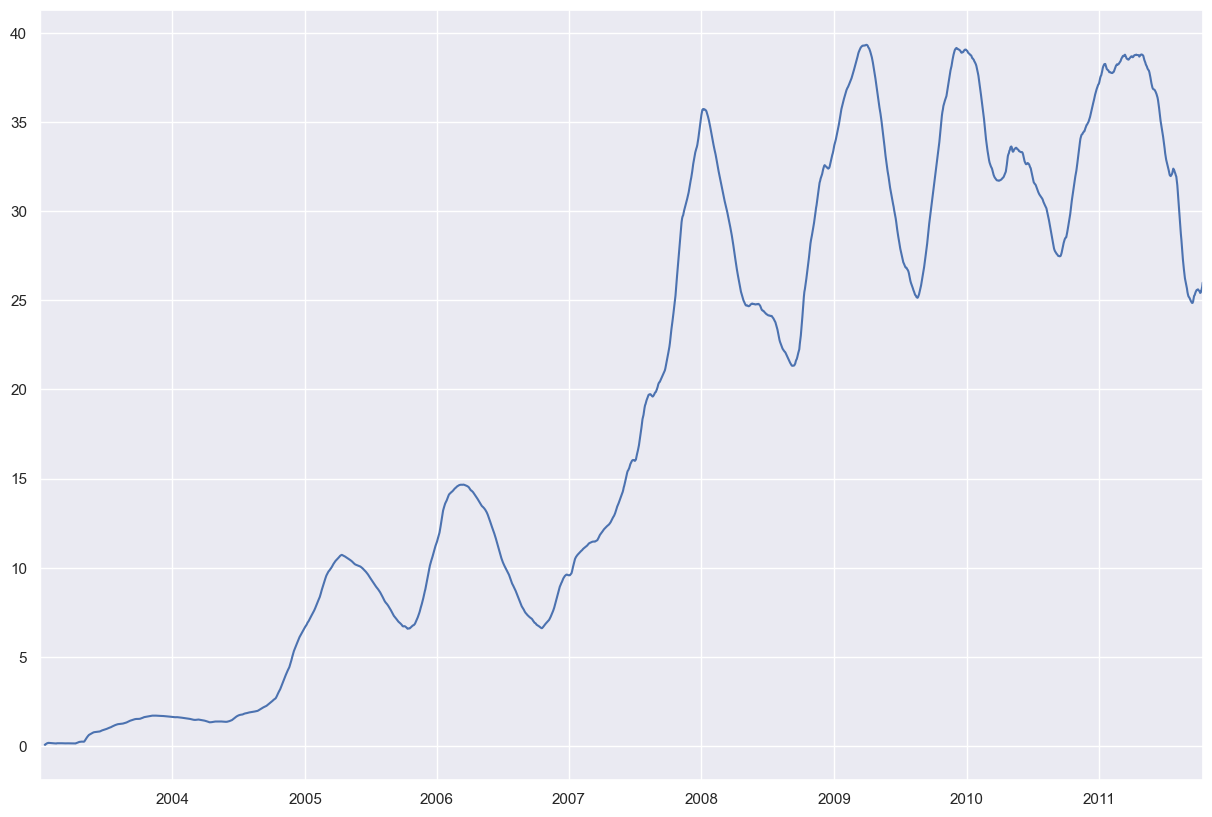

In [32]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
print(appl_std250[5:12])
appl_std250.plot(figsize=(15, 10))

In order to compute an expanding window mean, use the expanding operator instead of rolling. The expanding mean starts the time window from the beginning of the time series and increases the size of the window until it encompasses the whole series. An expanding window mean on the `apple_std250` time series looks like this:

c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future

<Axes: >

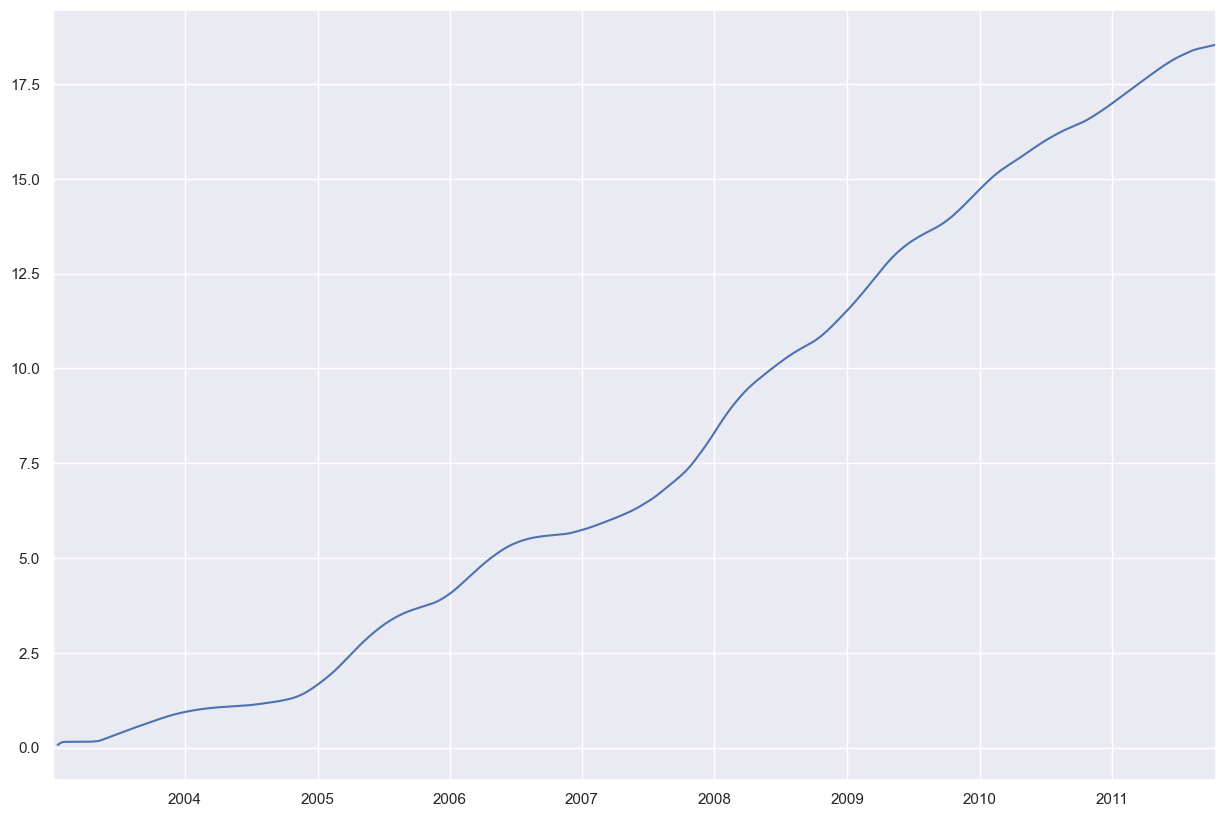

In [33]:
expanding_mean = appl_std250.expanding().mean()
expanding_mean.plot(figsize=(15, 10))

# 5. Stock Analysis
Taking Apple Inc. as an example, we will try to analyze the data from **`Yahoo Finance`** as a preparation for our analysis.

Apple Inc. on Yahoo finance:
https://finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch

## 5.1 Downloading Data

In [34]:
stock_data = yf.download("AAPL", start="2021-01-1", end="2021-10-01")
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.331696,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.906006,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.566818,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.817459,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.929276,105158200


## 5.2 Past Five-Year Performance

c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

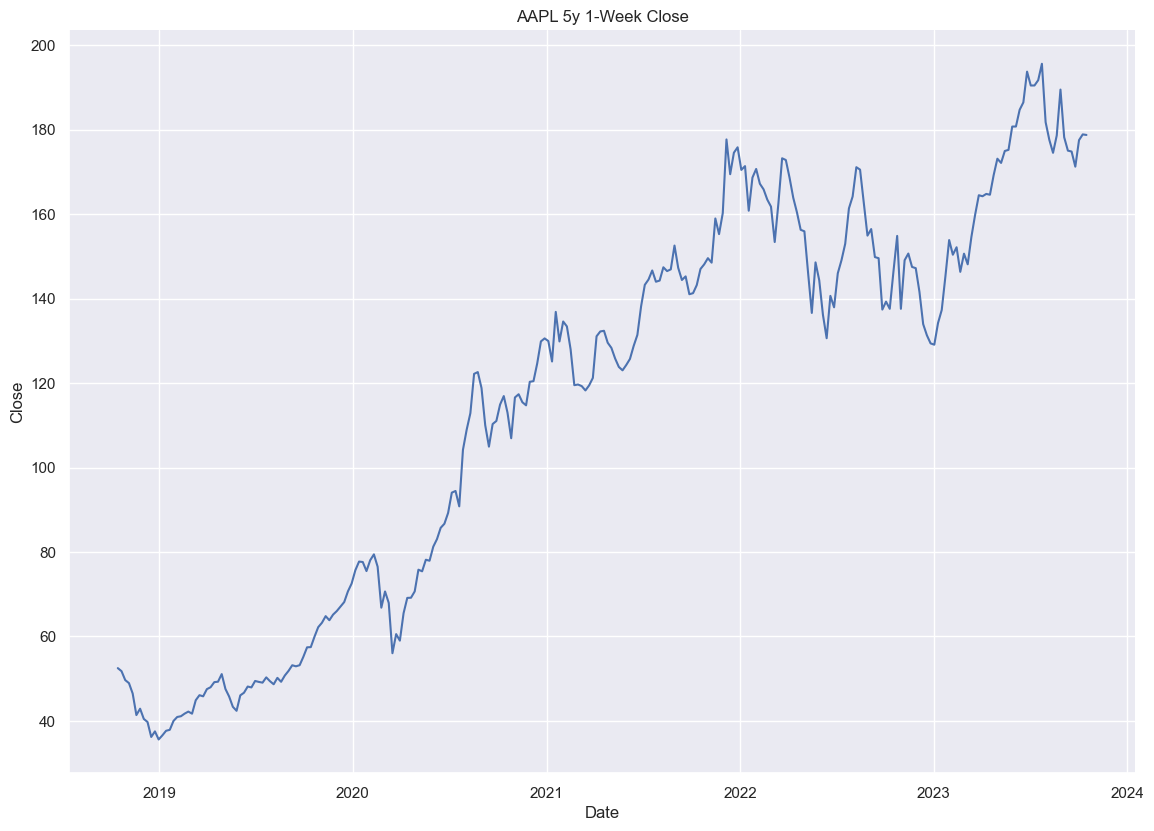

In [35]:
aapl = yf.Ticker("AAPL")
hist = aapl.history(period='5y', interval='1wk', back_adjust=False)
sns.relplot(kind="line", data=hist["Close"], height=8.27, aspect=11.7/8.27).set(title='AAPL 5y 1-Week Close')

## 5.3 More Information About the Tickers
We can have the full information about **`Apple Inc.`** from **`Yahoo Finance`**:

In [36]:
aapl.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

We can also get the information we wanted:

In [37]:
aapl.info['beta']


1.308

# 6. CAPM

**`Yahoo Finance`** provided the five-year monthly beta, we will try to get the same result by calculation.

Recall the CAPM formula:

\begin{equation}
    E(R_{\alpha}) = R_{f}+\beta\left(R_{m}-R_{f}\right)
\end{equation}

where

- $E(R_{\alpha})$ is the expected return of the capital asset
- $R_{f}$ is ther risk-free rate
- $E(R_{m})$ is the expected return of the market
- $\beta$ is the sensitivity

## 6.1 Stock Monthly Return

In [38]:
ticker = "AAPL"
stock_data = yf.download(ticker, start="2016-12-01", end="2023-08-31")

stock_prices = stock_data['Adj Close']
stock_prices = stock_prices.resample("1M").last()
returns = stock_prices.pct_change()
returns = returns.dropna()
returns.name = "Asset"
returns.head()

[*********************100%%**********************]  1 of 1 completed


Date
2017-01-31    0.047746
2017-02-28    0.133778
2017-03-31    0.048690
2017-04-30   -0.000070
2017-05-31    0.067807
Freq: M, Name: Asset, dtype: float64

## 6.2 Estimation of the Risk-Free Rate and Market Return
A risk-free rate is a theoretical rate of returns with no risk of loss. The risk-free rate could take the `3-Month T-Bill Rates`. As for the market return, we could use the S\&P 500 ('^GSPC' in **`Yahoo Finance`**) and calculate the market return as we did in the previous part.
However, we could also use the data gathered by Kenneth R. French.


The Fama-French-Factors data can be obtained from the website:
http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

We can also have it from the **`getFamaFrenchFactors`** package:
https://pypi.org/project/getFamaFrenchFactors/

In [39]:
# Download Fama-French factors (We need the returns of the market and the risk free rate)
ff3_monthly = pd.DataFrame(gff.famaFrench3Factor(frequency='m'))
ff3_monthly = ff3_monthly.tail(60)
ff3_monthly.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
ff3_monthly.set_index('Date', inplace=True)

# Create one DataFrame with all the values we need
ff_data = ff3_monthly.merge(returns, on='Date')
ff_data.head()

# Average risk-free rate
# rf = ff_data['RF'].mean()
# print(rf)

# Average market premium
# market_premium = ff_data['Mkt-RF'].mean()
# print(market_premium)

,Mkt-RF,SMB,HML,RF,Asset
Date,,,,,
2018-08-31,0.0344,0.0114,-0.0394,0.0016,0.200422
2018-09-30,0.0006,-0.0227,-0.0170,0.0015,-0.008303
2018-10-31,-0.0768,-0.0478,0.0340,0.0019,-0.030477
2018-11-30,0.0169,-0.0068,0.0030,0.0018,-0.181198
2018-12-31,-0.0957,-0.0238,-0.0184,0.0020,-0.116698


## 6.3 Estimation of Beta

### 6.3.1 Estimating Beta Using Linear Regression Fit

Now we have the expected returns of an asset, the risk-free rate and the expected returns of the market, we can reformulate the CAPM such that:

$$y = \beta x,$$

where

- $y = E(R_{\alpha})-R_{f}$
- $x = E(R_{m})-R_{f}$

so that we can use the linear regression from `statsmodels.api.OLS` to fit the line of best fit and, therefore, find the parameter $\beta$ of that best-fit line.

In [40]:
# Market returns - risk-free rate
x = ff_data['Mkt-RF']

# Asset returns - risk-free rate
ff_data['Asset-RF'] = ff_data['Asset'] - ff_data['RF']
y = ff_data['Asset-RF']

# Linear regression fitting
c = sm.add_constant(x)
capm_model = sm.OLS(y, c)
result = capm_model.fit()
print(result.summary())
intercept, beta = result.params
print(beta)

                            OLS Regression Results                            
Dep. Variable:               Asset-RF   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     73.46
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           6.82e-12
Time:                        11:48:26   Log-Likelihood:                 82.372
No. Observations:                  60   AIC:                            -160.7
Df Residuals:                      58   BIC:                            -156.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0161      0.008      1.973      0.0

### 6.3.2 Estimating Beta Using Covariance and Variance

We can <mark>rewrite the basic CAPM in terms of covariance and variance</mark>:

\begin{equation}
    \beta = \frac{\text { Covariance }\left(R_{e}, R_{m}\right)}{\operatorname{Variance}\left(R_{m}\right)}
\end{equation}

In [41]:
tickers = ['AAPL','^GSPC']
stock_data = yf.download(tickers, start="2016-12-01", end="2023-08-31")
stock_data.tail()

[                       0%%                      ]

[*********************100%%**********************]  2 of 2 completed


Adj Close                    Close                     High  \
                  AAPL        ^GSPC        AAPL        ^GSPC        AAPL   
Date                                                                       
2023-08-24  176.380005  4376.310059  176.380005  4376.310059  181.100006   
2023-08-25  178.610001  4405.709961  178.610001  4405.709961  179.149994   
2023-08-28  180.190002  4433.310059  180.190002  4433.310059  180.589996   
2023-08-29  184.119995  4497.629883  184.119995  4497.629883  184.899994   
2023-08-30  187.649994  4514.870117  187.649994  4514.870117  187.850006   

                                Low                     Open               \
                  ^GSPC        AAPL        ^GSPC        AAPL        ^GSPC   
Date                                                                        
2023-08-24  4458.299805  176.009995  4375.549805  180.669998  4455.160156   
2023-08-25  4418.459961  175.820007  4356.290039  177.380005  4389.379883   
2023-08-28  4439.560059  178.550003  4414.979980  180.089996  4426.029785   
2023-08-29  4500.140137  179.500000  4431.680176  179.699997  4432.750000   
2023-08-30  4521.649902  184.740005  4493.589844  184.940002  4500.339844   

              Volume              
                AAPL       ^GSPC  
Date                              
2023-08-24  54945800  3723470000  
2023-08-25  51449600  3296180000  
2023-08-28  43820700  2957230000  
2023-08-29  53003900  3354820000  
2023-08-30  60813900  3064110000

In [42]:
daily_returns = stock_data['Adj Close'].pct_change().dropna()
cov = daily_returns.cov()
var = daily_returns['^GSPC'].var()
beta_aapl = cov.loc['AAPL', '^GSPC']/var
print(beta_aapl)

1.2275303271615252


## 6.4 CAPM: Exercises

<div class="alert alert-warning">
<b>EXERCISE (1):</b>

Use the above methods to analyze one company from **Yahoo Finance** and find its beta.
</div>

In [43]:
# Solution

# 7. Modelling Stock Movements

In this section, we draw a simple random walk with both the standard python commands and with the **`NumPy`** library to show their differences in data analysis.

## 7.1 Modelling Stock Movements: Standard Python Implementation

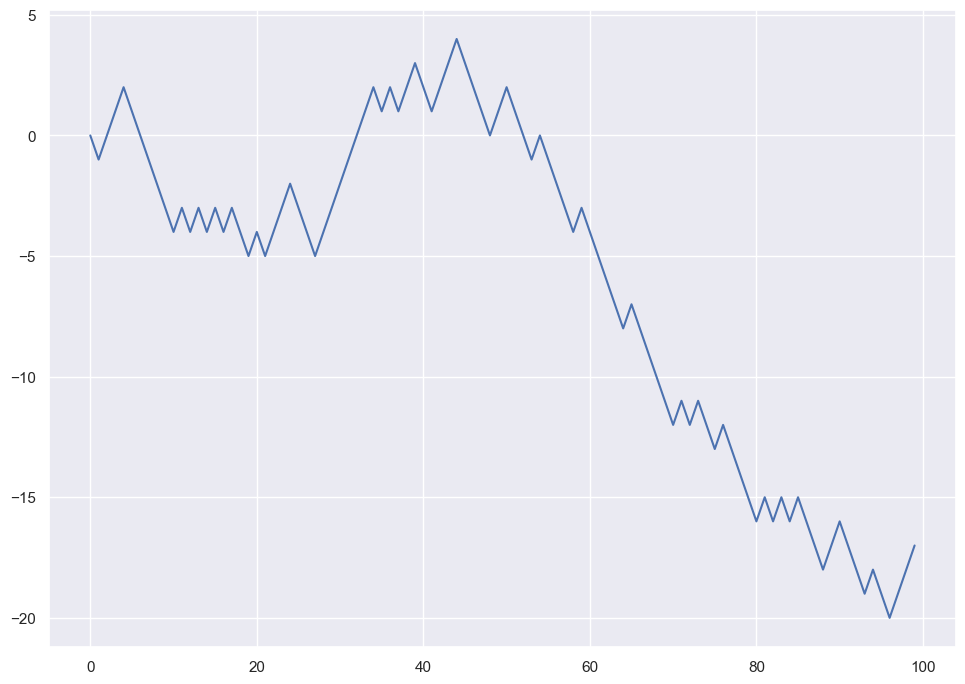

In [44]:
# Import packages
import random
import matplotlib.pyplot as plt

# Define a function to draw random walks
def random_walk_standard(n_steps):
    position = 0
    walk = [position]
    for i in range(n_steps):
        if random.randint(0, 1) == 0:
            step = 1
        else:
            step = -1
        position += step
        walk.append(position)
    return walk

# Plot the first 100 steps of the random walk
walk = random_walk_standard(1000)
plt.plot(walk[:100])
plt.show()

## 7.2 Modelling Stock Movements: NumPy Implementation

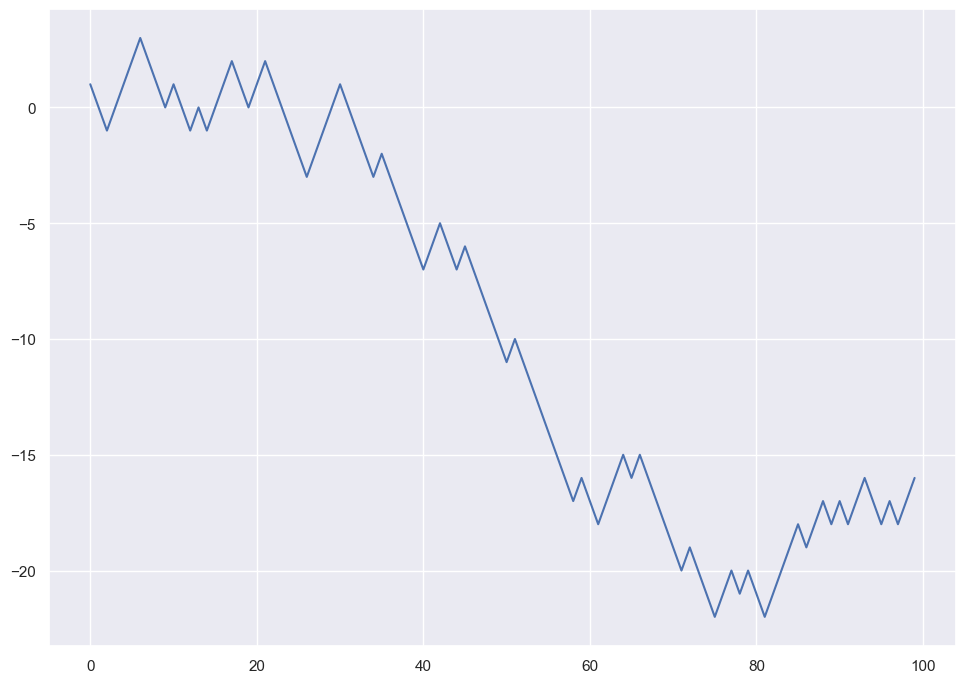

In [45]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Define a function to draw random walks
def random_walk_numpy(n_steps):
    draws = np.random.randint(0, 2, size=n_steps)
    steps = np.where(draws > 0, 1, -1)
    npwalk = steps.cumsum()
    return npwalk

# Plot the first 100 steps of the random walk
walk = random_walk_numpy(1000)
plt.plot(walk[:100])
plt.show()

## 7.3 Modelling Stock Movements: Brownian Motion

Now that we have an understanding of stock movements and their portrayals via random walks. We can use our knowledge of the stock market to create models for prices. One very well known model would be the brownian motion modelling of stock prices.

A simplified description of the brownian motion model can be structured as follows:
    
The price of a stock is made up of two components, the <mark>drift (i.e., the trend)</mark>, and the <mark>diffusion (random movements up or down)</mark>. Combining the two in such a way that the timestep between movements and the movement itself to produce a stable process will give us the same mathematical stock model that is used to derive the infamous Black Scholes Equation.

If you'd like to look further into the maths, you may look into these wikipedia pages:

[Brownian Motion](https://en.wikipedia.org/wiki/Brownian_motion)

[Black Scholes Equation](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_equation)



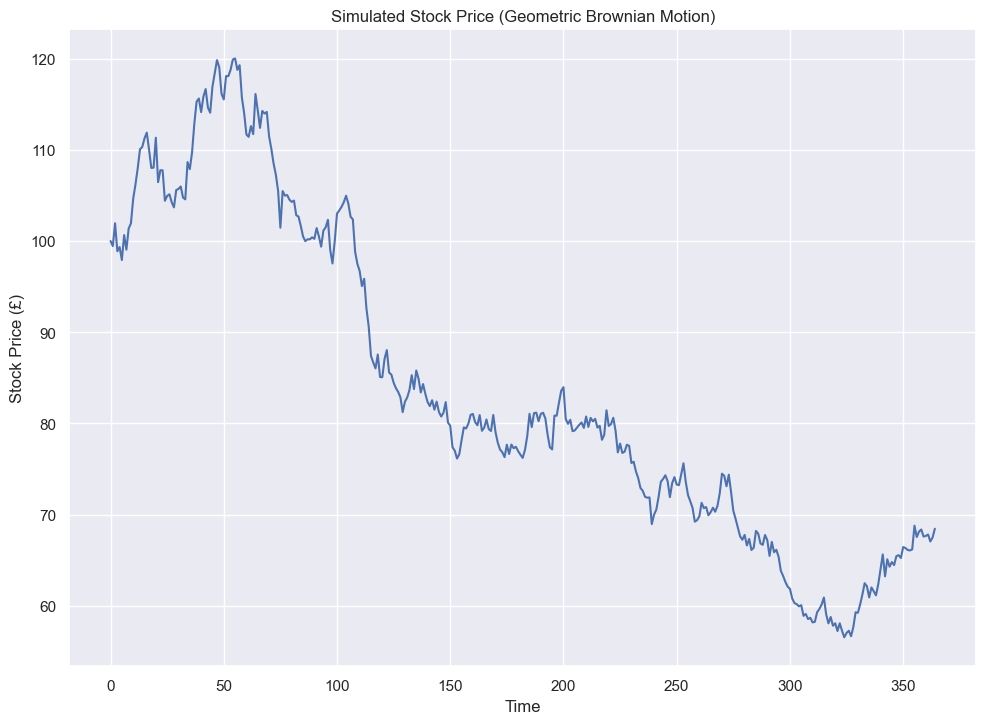

In [46]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Drift coefficent
mu = 0.1
# Length of simulation (i.e., number of time steps)
n = 365
# Number of steps
dt = 1/n
# Initial stock price
s_0 = 100
# Array of stock prices
s = s_0*np.ones(n)
# Volatility
sigma = 0.3
# Time
Time = range(0,n)

# Simulation of stock price as a geometric brownian motion
for i in Time[:-1]:
    w = np.random.normal(0,1)
    s[i+1] = s[i] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * dt**(1/2) * w)

plt.plot(s)
plt.ylabel('Stock Price (£)')
plt.xlabel('Time')
plt.title('Simulated Stock Price (Geometric Brownian Motion)')
plt.show()

## 7.4 Modelling Stock Movements: Exercises

You can see that the above model, is able to generate paths that are much more similar to real stock price movements than just the standard random walk. We will use the stock price generated above for some exercises:

<div class="alert alert-warning">
<b>EXERCISE (2): </b>

For the above simulated stock price which pays no dividends, for the scenario that you can predict the future stock price with 100% accuracy (i.e. the future price is known), write a function to calculate the cost of equity capital (market capitalisation rate).
</div>

$$r = \frac{D_{1} + P_{1} - P_{0}}{P_{0}},$$

where

- $P_{0}$ is the current share price
- $P_{1}$ is the expected share price at the end of the time period
- $D_{1}$ is the expected dividend payout per share at the end of the time period
- $r$ is the cost of equity capital

In [47]:
# Solution

<div class="alert alert-warning">
<b>EXERCISE (3): </b>

Write a function **unprofitable_day** taking in the above simulated stock price and outputs the days where the cost of equity capital (market capitalisation rate) is negative.
</div>

<div class="alert alert-info">    
<b>HINT:</b> <br>
The the cost of equity capital (market capitalisation rate) needs to be calculated for time 0 to 354.

Store these values sequentially in list or numpy array called <i>r</i>.
</div>

In [48]:
# Solution

<div class="alert alert-warning">
<b>EXERCISE (4): </b>

Calculate the **% return on equity** for a **buy and hold strategy** at the end of the simulation **t=365** for the simulated stock above.

Then, calculate the **% return on equity** for a **strategy which holds the stock if and only if the cost of equity capital is positive**, we can call this our oracle strategy.
</div>

In [49]:
# Solution

<div class="alert alert-warning">
<b>EXERCISE (5): </b>

Can you design a trading strategy for the simulated stock above?

What is the return of the strategy at the end of the year?

What is the standard deviations of returns, does it fare better than the returns and standard deviation of underlying asset itself (equivalent to buy and hold)?
</div>

In [50]:
# Write your code doing the above analytics and trading strategy here

<div class="alert alert-info">
<b>HINT:</b>

For the above, if you're having trouble coming up with trading stratgies, you may take inspiration from **momentum trading**, **volatility band trading strategies**, **mean reversal strategies**.
    
It may also be useful to think about, what will be a buy signal or sell signal for your strategy (indicators to tell you when you should buy and sell).

If a certain buy condition is met, then buy. If a certain sell condition is met, then sell. Otherwise wait for an opportunity.
    
In trading, it is considered virtuous to sticking to a trading strategy. If the strategy isn't producing the expected results or is not performing, it would be wise to cut losses and engineer another strategy.
</div>

<div class="alert alert-warning">
<b>EXERCISE (6): </b>

Find out the definition of maximum drawdown.
</div>

Solution

<div class="alert alert-warning">
<b>EXERCISE (7): </b>

What is the maximum drawdown of the strategies listed above, create code taking in the list of returns of a trading strategy, outputting then the maximum drawdown of the strategy's returns.
</div>

In [51]:
# Solution

# 8. Capital Structure: Case Study

Continuing on with **`Yahoo Finance`**, we will investigate the evidence for theories of capital structure discussed during Corporate Finance 2 lecture.

In [52]:
import yfinance as yf

Amazon = yf.Ticker("AMZN")
# General information on Amazon
Amazon.info 

{'address1': '410 Terry Avenue North',
 'city': 'Seattle',
 'state': 'WA',
 'zip': '98109-5210',
 'country': 'United States',
 'phone': '206 266 1000',
 'website': 'https://www.aboutamazon.com',
 'industry': 'Internet Retail',
 'industryKey': 'internet-retail',
 'industryDisp': 'Internet Retail',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': "Amazon.com, Inc. engages in the retail sale of consumer products and subscriptions through online and physical stores in North America and internationally. It operates through three segments: North America, International, and Amazon Web Services (AWS). The company's products offered through its stores include merchandise and content purchased for resale; and products offered by third-party sellers. It also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Rings, Blink, eero, and Echo; and develops and produces media content. In addit

In [53]:
# Available information
print(Amazon.info.keys())

# For example, we can get the dividend information
Amazon.dividends

dict_keys(['address1', 'city', 'state', 'zip', 'country', 'phone', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendYield', 'payoutRatio', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDividendYield', 'currency', 'enterpriseValue', 'profitMargins', 'floatShares', 'sharesOutstanding',

Series([], Name: Dividends, dtype: float64)

In [54]:
# We can check all the methods available to the Ticker class
print(dir(Amazon))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_analysis', '_base_url', '_data', '_download_options', '_earnings', '_earnings_dates', '_expirations', '_fast_info', '_fetch_ticker_tz', '_financials', '_fix_bad_stock_split', '_fix_missing_div_adjust', '_fix_prices_sudden_change', '_fix_unit_mixups', '_fix_unit_random_mixups', '_fix_unit_switch', '_fix_zeroes', '_fundamentals', '_get_ticker_tz', '_history', '_history_metadata', '_history_metadata_formatted', '_holders', '_isin', '_news', '_options2df', '_quote', '_reconstruct_intervals_batch', '_reconstruct_start_interval', '_shares', '_tz', '_underlying', 'actions', 'analyst_price_target', 'balance_sheet', 'balancesheet', 'basic

In [55]:
Amazon.financials

,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.4,0.12558,0.118413,0.169863
Normalized EBITDA,38352000000.0,74256000000.0,51076000000.0,37365000000.0
Total Unusual Items,-16266000000.0,14652000000.0,NaN,203000000.0
Total Unusual Items Excluding Goodwill,-16266000000.0,14652000000.0,NaN,203000000.0
Net Income From Continuing Operation Net Minority Interest,-2722000000.0,33364000000.0,21331000000.0,11588000000.0
Reconciled Depreciation,41921000000.0,34296000000.0,25251000000.0,21789000000.0
Reconciled Cost Of Revenue,446343000000.0,403507000000.0,334564000000.0,241699000000.0
EBITDA,38352000000.0,74256000000.0,51076000000.0,37365000000.0
EBIT,-3569000000.0,39960000000.0,25825000000.0,15576000000.0


<div class="alert alert-warning">
<b>EXERCISE (8): </b>

Knowing **Amazon.info** is a **dict** data type from the above inspection. Use your knowledge of the **dict** data type to extract, via code, the **Debt to Equity ratio** of Amazon.
</div>

In [56]:
# Solution

<div class="alert alert-warning">
<b>EXERCISE (9): </b>

Write a function taking in the Ticker symbol as a string (i.e., 'AMZN'), returning the debt to equity ratio of the input ticker.
</div>

In [57]:
# Solution

<div class="alert alert-warning">
<b>EXERCISE (10): </b>

Taking the additional information available from **Yahoo Finance** tickers and using your above function, investigate the evidence supporting both **trade-off theory** and **pecking order theory**:

* **Size**: Large firms have higher debt ratios.
* **Tangible Assets**: Firms with high ratios of fixed assets to total assets have higher debt ratios.
* **Profitability**: More profitable firms have lower debt ratios.
* **Market-to-Book**: Firms with higher ratios of market to book value have lower debt ratios.

It would be wise to use plots to show the above correlations.
</div>

In [58]:
# Solution

<h1> Credits </h1>

- Python for Data Analysis, Chapter 4, 2013, Wes McKinney [Git](https://github.com/wesm/pydata-book/blob/2nd-edition/ch04.ipynb)


- Hilpisch, Yves. Python for Finance. Sebastopol: O'Reilly Media, Incorporated, 2019. Web. [Access through UCL library.](https://ucl-new-primo.hosted.exlibrisgroup.com/primo-explore/fulldisplay?docid=TN_cdi_askewsholts_vlebooks_9781492024316&context=PC&vid=UCL_VU2&lang=en_US&search_scope=CSCOP_UCL&adaptor=primo_central_multiple_fe&tab=local&query=any,contains,python%20for%20finance%20oreilly&offset=0)


- Weiming, James. Mastering Python for Finance - Second Edition / Weiming, James. 2nd ed. 2019. Web. [Access through UCL library.](https://ucl-new-primo.hosted.exlibrisgroup.com/primo-explore/fulldisplay?docid=UCL_LMS_DS51288263270004761&context=L&vid=UCL_VU2&lang=en_US&search_scope=CSCOP_UCL&adaptor=Local%20Search%20Engine&tab=local&query=any,contains,python%20for%20finance%20oreilly&offset=0)


- Introduction to Time Series Forecasting with Python - Jason Brownlee, Machine Learning Mastery 2017


- [A Guide to Time Series Forecasting with ARIMA in Python](https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3)


- Python for Data Analysis, Wes McKinney, Chapter 11 [Git](https://github.com/wesm/pydata-book/blob/2nd-edition/ch11.ipynb)